In [51]:
import google.datalab.bigquery as bq
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

print(__doc__)
from time import time
from scipy import ndimage
from sklearn import manifold, datasets

Automatically created module for IPython interactive environment


<h1>Students entries August 2018, November 2018, February 2019 </h1>

<h2>Read from Big Query</h2>

In [19]:
sql = """
    SELECT
     *
    FROM
    `big-data-analytics-2.agnesDataset.death_rate`
"""

In [20]:
df = bq.Query(sql).execute().result().to_dataframe()

In [ ]:
df

<h1>AGNES</h1>

In [21]:
X = np.array(df)
X

array([[   0. ,    0. ,    0. , ...,   23.6,  214.1, 1216.9],
       [   0. ,    0. ,    0. , ...,   22.4,  211.9, 1174.2],
       [   0. ,    0. ,    0. , ...,   19.6,  185.6, 1006.8],
       ...,
       [   1.9,    2.5,    2.6, ...,  763.5, 1299.7, 1792.3],
       [   1.9,    2.6,    2.6, ...,  787.2, 1308.8, 1812.4],
       [  29.4,    7.6,    3.6, ...,   45.1,  108.7,  349.1]])

In [33]:
n_clusters=9
#distance= 'euclidean'
distance= 'cosine'
linkage_method='complete'

=> linkage : {“ward”, “complete”, “average”, “single”}, optional (default=”ward”)
Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

* ward minimizes the variance of the clusters being merged.
* average uses the average of the distances of each observation of the two sets.
* complete or maximum linkage uses the maximum distances between all observations of the two sets.
* single uses the minimum of the distances between all observations of the two sets.


=> n_clusters : The number of clusters to find.

=> affinity : Metric used to compute the linkage. 
Can be “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or ‘precomputed’. 
If linkage is “ward”, only “euclidean” is accepted.

=> memory : cache the output of the computation of the tree.(Optional)

=> connectivity: connectivity matrix as kneighbors_graph, the hierarchical clustering algorithm is unstructured.(Optional)

=> compute_full_tree : bool or ‘auto’ (optional)
Stop early the construction of the tree at n_clusters. This is useful to decrease computation, useful only when specifying connectivity matrix and caching, it may be advantageous to compute the full tree.

pooling_func : callable, default=’deprecated’ Ignored.

In [34]:
AgglomerativeClustering(affinity=distance, compute_full_tree='auto',
            connectivity=None, linkage=linkage_method, memory=None, n_clusters=n_clusters,
            pooling_func='deprecated')

AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None,
            n_clusters=9, pooling_func='deprecated')

<h2>Attributes</h2>

heart
malignant_neoplasms 
accidents_unintentional_injuries
chronic_lower_respiratory_diseases_J40_J47
cerebrovascular_diseases_I60–I69
alzheimers_disease
diabetes_mellitus
influenza_and_pneumonia

In [35]:
X = np.array(df)

In [36]:
clustering = AgglomerativeClustering().fit(X)

cluster labels for each point

In [37]:
y =clustering.labels_
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

Number of leaves in the hierarchical tree.

In [38]:
clustering.n_leaves_

131

Automatically created module for IPython interactive environment
Compute unstructured hierarchical clustering...
Elapsed time: 0.00s
Number of points: 131
Compute structured hierarchical clustering...
Elapsed time: 0.02s
Number of points: 131


/usr/local/envs/py2env/lib/python2.7/site-packages/sklearn/cluster/hierarchical.py:193: UserWarning: the number of connected components of the connectivity matrix is 5 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')


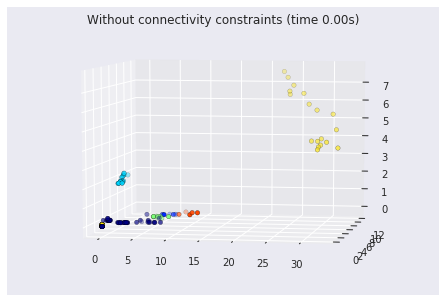

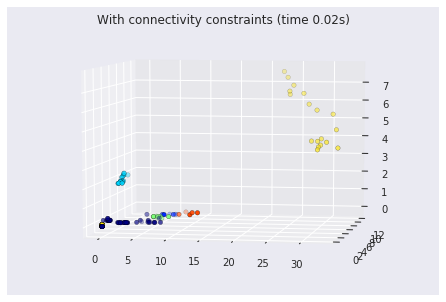

In [53]:
print(__doc__)

import time as time
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets.samples_generator import make_swiss_roll

# #############################################################################
# Compute clustering
print("Compute unstructured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(n_clusters=6, linkage='ward').fit(X)
elapsed_time = time.time() - st
label = ward.labels_
print("Elapsed time: %.2fs" % elapsed_time)
print("Number of points: %i" % label.size)

# #############################################################################
# Plot result
fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
for l in np.unique(label):
    ax.scatter(X[label == l, 0], X[label == l, 1], X[label == l, 2],
               color=plt.cm.jet(np.float(l) / np.max(label + 1)),
               s=20, edgecolor='k')
plt.title('Without connectivity constraints (time %.2fs)' % elapsed_time)


# #############################################################################
# Define the structure A of the data. Here a 10 nearest neighbors
from sklearn.neighbors import kneighbors_graph
connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)

# #############################################################################
# Compute clustering
print("Compute structured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(n_clusters=6, connectivity=connectivity,
                               linkage='ward').fit(X)
elapsed_time = time.time() - st
label = ward.labels_
print("Elapsed time: %.2fs" % elapsed_time)
print("Number of points: %i" % label.size)

# #############################################################################
# Plot result
fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
for l in np.unique(label):
    ax.scatter(X[label == l, 0], X[label == l, 1], X[label == l, 2],
               color=plt.cm.jet(float(l) / np.max(label + 1)),
               s=20, edgecolor='k')
plt.title('With connectivity constraints (time %.2fs)' % elapsed_time)

plt.show()
        

Computing embedding
Done.
ward :	0.00s
average :	0.00s
complete :	0.00s


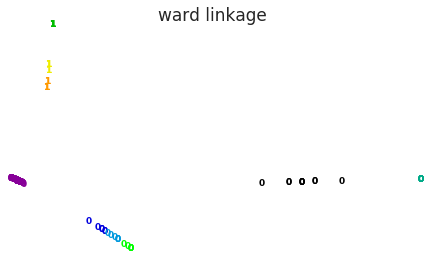

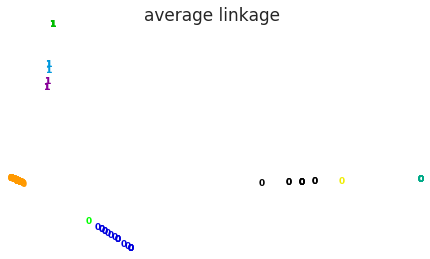

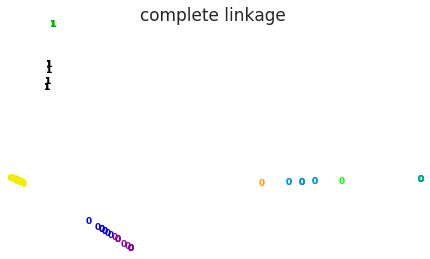

In [39]:
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#----------------------------------------------------------------------

#----------------------------------------------------------------------
# 2D embedding of the digits dataset
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
print("Done.")

for linkage in ('ward', 'average', 'complete'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=n_clusters)
    t0 = time()
    clustering.fit(X_red)
    print("%s :\t%.2fs" % (linkage, time() - t0))

    plot_clustering(X_red, clustering.labels_, "%s linkage" % linkage)


plt.show()


In [40]:
def hierarchical_Clustering_Dendrogram (X, method, metric, xlabel):
  linkage_matrix = linkage(X, method, metric)
  figure = plt.figure(figsize=(7.5, 5))
  dendrogram(
      linkage_matrix,
      color_threshold=0,
      leaf_rotation=90.,  # rotates the x axis labels
      leaf_font_size=8.,
      truncate_mode='lastp', #show only the last p merged clusters
  )
  plt.title('Hierarchical Clustering Dendrogram '+method)
  plt.xlabel(xlabel)
  plt.ylabel('distance')
  plt.tight_layout()
  plt.show()

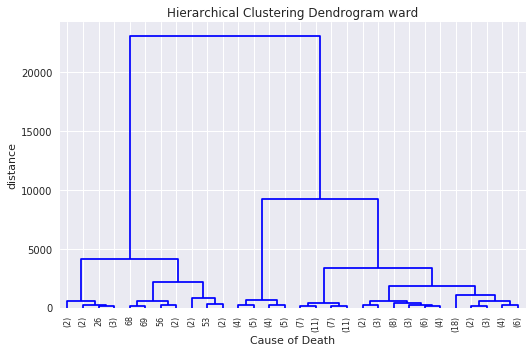

In [45]:
hierarchical_Clustering_Dendrogram(X, 'ward', 'euclidean', 'Cause of Death')

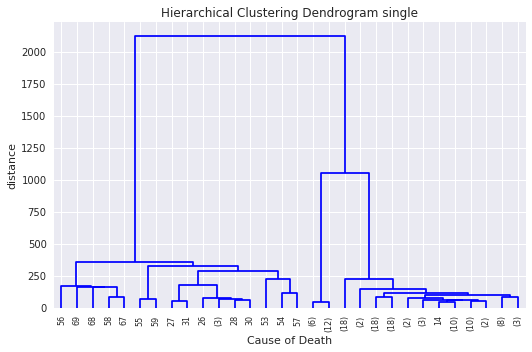

In [46]:
hierarchical_Clustering_Dendrogram(X, 'single', 'euclidean', 'Cause of Death')

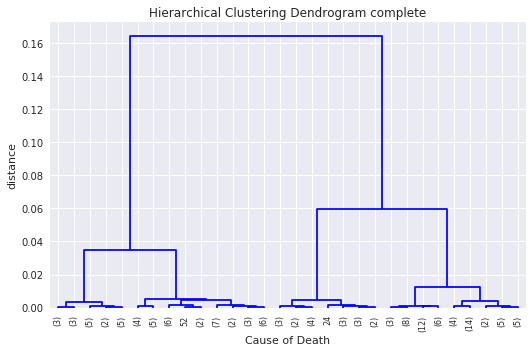

In [47]:
hierarchical_Clustering_Dendrogram(X, 'complete', 'cosine', 'Cause of Death')

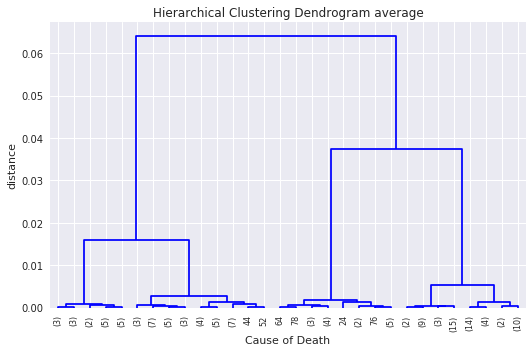

In [48]:
hierarchical_Clustering_Dendrogram(X, 'average', 'cosine', 'Cause of Death')